In [2]:

import clawpack.pyclaw as pyclaw 
import os, fnmatch
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from clawpack.pyclaw.solution import Solution
from clawpack.pyclaw import solution

    
# Finding the home directory
from os.path import expanduser
home = expanduser("~")
cwd = os.getcwd()

user_directory = cwd

dirName = '_output'  #directory in which the results lie
dirAddress = user_directory+"/"+dirName

print("Here are the output files: "+dirAddress)
files=fnmatch.filter(os.listdir(dirAddress), 'fort.q*' )
NbSim = len(files)
print("number of files: "+str(NbSim))

Here are the output files: /home/ancey/dossier_Clawpack/flume_Dambreak_inviscid_Wet-bed/_output
number of files: 41


# Particular solution 

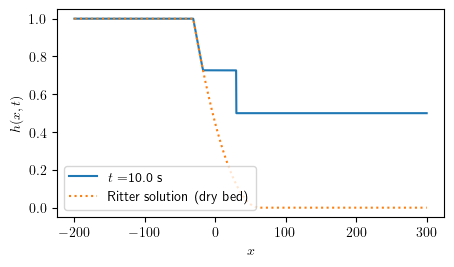

In [3]:
# Plot solution h(x, t)

frameNo = 10
framesoln = solution.Solution(frameNo,  path=dirAddress,file_format='ascii')

x=framesoln.state.grid.x.centers
h=framesoln.state.q[0]
g = 9.81 ; h0 = 1 ; c0 = np.sqrt(g*h0) ; tt = framesoln.t
htrue=(2*c0-x/tt)**2/9/g*np.where((x < 2*c0*tt) & (-c0*tt<x), 1, 0)+np.where( x < -c0*tt  , 1,0)
 
plt.rcParams['text.usetex'] = True
 
#true = qtrue(x,t)
fig, ax = plt.subplots(figsize=(5, 2.7))
 
ax.plot(x, h,  label=r'$ t = $'+str(framesoln.t)+" s")
ax.plot(x, htrue, ':',label='Ritter solution (dry bed)')
ax.legend(loc='lower left')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$h(x, t)$');

Text(0, 0.5, '$u(x, t)$')

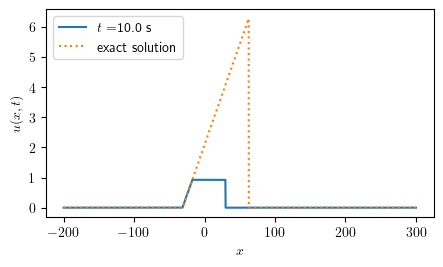

In [4]:
 # Plot solution u(x, t)
 
hu = framesoln.state.q[1]
dim = np.size(hu)
u=np.empty(dim)
for i in range(dim):
    if h[i]>0:
        u[i] = hu[i]/h[i]
    else:
        u[i] = 0.
 
utrue= 2/3*(c0+x/tt) * np.where((x < 2*c0*tt) & (-c0*tt<x), 1, 0)
 
plt.rcParams['text.usetex'] = True
 
#true = qtrue(x,t)
fig, ax = plt.subplots(figsize=(5, 2.7))
 
ax.plot(x, u,  label=r'$ t = $'+str(framesoln.t)+" s")
ax.plot(x, utrue, ':',label='exact solution')
ax.legend(loc='upper left')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u(x, t)$')

# Animation

In [5]:
# Animation for depth 
def dambreak_animation():
    sol=solution.Solution(1, path=dirAddress, file_format='ascii')
    frame = np.empty((NbSim,)+sol.state.q.shape)
    xsol = np.empty((NbSim, sol.state.q.shape[1]))
    hsol = np.empty((NbSim, sol.state.q.shape[1]))
    tps  = np.empty(NbSim)

    for i in range(0,NbSim):
        sol     = solution.Solution(i, path=dirAddress, file_format='ascii')
        tps[i]  = sol.t
        xsol[i] = sol.state.grid.x.centers
        hsol[i] = sol.state.q[0]

    hmin = 0.0
    hmax = 1.1
    L = max(sol.grid.x.centers)
    x0 = min(sol.grid.x.centers)
    
    x_true = np.linspace(x0, L , 500)
    
    fig = plt.figure()
    axes = plt.subplot(1, 1, 1)
    plt.rcParams['text.usetex'] = True
    axes.set_xlabel(r'$x$',fontsize=14)
    axes.set_ylabel(r'$h(x, t)$',fontsize=14)
    axes.set_xlim((x[0], x[-1]))
    axes.set_ylim(( hmin, hmax))
    axes.set_title(" ")
    text = axes.text(L/2, 0.9*hmax , '')
 
    def init():
        computed_line, = axes.plot(xsol[0][0], hsol[0][0], 'r')
        exact_line, = axes.plot(x_true[0], 0 , 'k--')
        return  (computed_line, exact_line)
    
    computed_line, exact_line = init()
 
    def fplot(n):
        tt = tps[n]
        if tt>0:
            htrue=(2*c0-x_true/tt)**2/9/g  \
             *np.where((x_true < 2*c0*tt) & (-c0*tt<x_true), 1, 0)+np.where(x_true < -c0*tt  , 1,0)
        else:
            htrue= np.where(x_true < 0 , 1,0)
        computed_line.set_data([xsol[n],], [hsol[n][:]])
        exact_line.set_data([x_true], [htrue])
        tt = tps[n]
        val = f'{tt:.2f}'
        text.set_text(r'$ t = {} $ s'.format(val))
         
        return (computed_line, exact_line)

    frames_to_plot = range(0, NbSim)
    plt.close(fig)
    return matplotlib.animation.FuncAnimation(fig, fplot, frames=frames_to_plot, interval=100,
                                   blit=True, init_func=None, repeat=False)


from IPython.display import HTML 
anim = dambreak_animation( )
HTML(anim.to_jshtml()) 

2024-02-10 01:15:02,290 INFO CLAW: Animation.save using <class 'matplotlib.animation.HTMLWriter'>


In [6]:
# Animation for velocity 
def dambreak_animation_velocity():
    sol=solution.Solution(1, path=dirAddress, file_format='ascii')
    frame = np.empty((NbSim,)+sol.state.q.shape)
    xsol = np.empty((NbSim, sol.state.q.shape[1]))
    hsol = np.empty((NbSim, sol.state.q.shape[1]))
    qsol = np.empty((NbSim, sol.state.q.shape[1]))
    usol = np.empty((NbSim, sol.state.q.shape[1]))
    tps  = np.empty(NbSim)

    for i in range(0,NbSim):
        sol     = solution.Solution(i, path=dirAddress, file_format='ascii')
        tps[i]  = sol.t
        xsol[i] = sol.state.grid.x.centers
        hsol[i] = sol.state.q[0]
        qsol[i] = sol.state.q[1]
        usol[i] = np.where(hsol[i]>0.,1/(1e-10+hsol[i]),0.)*qsol[i]


    umin = 0.0
    umax = 6
    L = max(sol.grid.x.centers)
    x0 = min(sol.grid.x.centers)
    
    x_true = np.linspace(x0, L , 500)
    
    fig = plt.figure()
    axes = plt.subplot(1, 1, 1)
    plt.rcParams['text.usetex'] = True
    axes.set_xlabel(r'$x$',fontsize=14)
    axes.set_ylabel(r'$u(x, t)$',fontsize=14)
    axes.set_xlim((x[0], x[-1]))
    axes.set_ylim(( umin, umax))
    axes.set_title(" ")
    text = axes.text(L/2, 0.9*umax , '')
 
    def init():
        computed_line, = axes.plot(xsol[0][0], usol[0][0], 'r')
        exact_line, = axes.plot(x_true[0], 0 , 'k--')
        return  (computed_line, exact_line)
    
    computed_line, exact_line = init()
    
    def fplot(n):
        tt = tps[n]
        if tt>0:
            utrue=( c0+x_true/tt)*2/3 * np.where((x_true < 2*c0*tt) & (-c0*tt<x_true), 1, 0) 
        else:
            utrue= 0
        computed_line.set_data([xsol[n],], [usol[n][:]])
        exact_line.set_data([x_true], [utrue])
        tt = tps[n]
        val = f'{tt:.2f}'
        text.set_text(r'$ t = {} $ s'.format(val))
         
        return (computed_line, exact_line)

    frames_to_plot = range(0, NbSim)
    plt.close(fig)
    return matplotlib.animation.FuncAnimation(fig, fplot, frames=frames_to_plot, interval=100,
                                   blit=True, init_func=None, repeat=False)


from IPython.display import HTML 
anim_u = dambreak_animation_velocity( )
HTML(anim_u.to_jshtml())

2024-02-10 01:15:08,713 INFO CLAW: Animation.save using <class 'matplotlib.animation.HTMLWriter'>


## mp4

In [10]:
# Export mp4
anim.save('DamBreakWet_depth.mp4',fps=5,writer="ffmpeg",dpi=300)
anim_u.save('DamBreak_velocity.mp4',fps=5,writer="ffmpeg",dpi=300)

2024-02-05 17:18:14,241 INFO CLAW: Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2024-02-05 17:18:14,242 INFO CLAW: MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 1920x1440 -pix_fmt rgba -framerate 5 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y DamBreakWet_depth.mp4
2024-02-05 17:18:19,857 INFO CLAW: Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2024-02-05 17:18:19,862 INFO CLAW: MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 1920x1440 -pix_fmt rgba -framerate 5 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y DamBreak_velocity.mp4


## png

In [17]:
# To decompose the move into snapshot (but often fails... see the alternative)
import subprocess
subprocess.run(["convert", "-coalesce", "DamBreak.mp4", "Dambreak.png"])

convert-im6.q16: cache resources exhausted `DamBreak.mp4' @ error/cache.c/OpenPixelCache/4095.


CompletedProcess(args=['convert', '-coalesce', 'DamBreak.mp4', 'Dambreak.png'], returncode=1)

In [7]:
# Alternative to export snapshots
def ExportAnimation():
    figs = []
 
    sol=solution.Solution(1, path=dirAddress, file_format='ascii')
    frame = np.empty((NbSim,)+sol.state.q.shape)
    xsol = np.empty((NbSim, sol.state.q.shape[1]))
    hsol = np.empty((NbSim, sol.state.q.shape[1]))
    tps  = np.empty(NbSim)

    for i in range(0,NbSim):
        sol     = solution.Solution(i, path=dirAddress, file_format='ascii')
        tps[i]  = sol.t
        xsol[i] = sol.state.grid.x.centers
        hsol[i] = sol.state.q[0]

    hmin = 0.0
    hmax = 1.1
    L = max(sol.grid.x.centers)
    x0 = min(sol.grid.x.centers)
    xmoy = (L+x0)/2

 
    for i in range(0,NbSim):
        fig = plt.figure()
        axes = plt.subplot(1, 1, 1)
        plt.rcParams['text.usetex'] = True
        axes.set_xlabel(r'$x$',fontsize=14)
        axes.set_ylabel(r'$h(x, t)$',fontsize=14)
        axes.set_xlim((x0,L))
        axes.set_ylim(( hmin, hmax))
        text = axes.text(L/2, 0.9*hmax , '')
        tt = tps[i]
        val = f'{tt:.2f}'
        text.set_text(r'$ t = {} $ s'.format(val))
        axes.set_title(" ")
        text = axes.text(xmoy, 0.9*hmax , '')
        text = axes.text(xmoy, 0.9*hmax , '')
        axes.plot(xsol[i] , hsol[i] , 'r')
        figs.append(fig)
        plt.close(fig)
    return figs

from clawpack.visclaw import animation_tools
figures = ExportAnimation()
animation_tools.interact_animate_figs(figures)

interactive(children=(IntSlider(value=0, description='frameno', max=40), Output()), _dom_classes=('widget-inte…

In [8]:
# export figures for latex
if not os.path.isdir('DambreakWetSnapshots'): os.mkdir(user_directory+"/DambreakWetSnapshots")
for i in range(len(figures)):
    figures[i].savefig(user_directory+'/DambreakWetSnapshots/DambreakFrame'+str(i)+'.png', bbox_inches='tight',dpi=300)